In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd, numpy as np

In [3]:
churn_data=pd.read_csv("churn_data.csv")
churn_data.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
cust_data=pd.read_csv("customer_data.csv")
cust_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [5]:
internet_data=pd.read_csv("internet_data.csv")
internet_data.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No


In [6]:
df_1=pd.merge(churn_data, cust_data, how='inner', on='customerID')

In [7]:
telecom=pd.merge(df_1, internet_data, how='inner', on='customerID')

In [8]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,...,No,No,No,Fiber optic,No,No,No,No,No,No


In [9]:
df_1.columns

Index(['customerID', 'tenure', 'PhoneService', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'gender',
       'SeniorCitizen', 'Partner', 'Dependents'],
      dtype='object')

In [10]:
telecom.shape

(7043, 21)

In [11]:
telecom.describe()

,tenure,MonthlyCharges,SeniorCitizen
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.162147
std,24.559481,30.090047,0.368612
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,0.000000
50%,29.000000,70.350000,0.000000
75%,55.000000,89.850000,0.000000
max,72.000000,118.750000,1.000000


In [12]:
varlist=['PhoneService', 'PaperlessBilling', 'Churn', 'Partner', 'Dependents']
def binary_map(x):
    return x.map({'Yes':1, 'No':0})
telecom[varlist]=telecom[varlist].apply(binary_map)

In [13]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,1,0,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,...,0,0,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,0,0,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,0,0,No,Fiber optic,No,No,No,No,No,No


In [14]:
telecom.shape

(7043, 21)

In [15]:
dummy1=pd.get_dummies(telecom[['Contract', 'PaymentMethod', 'gender', 'InternetService']], drop_first=True)

In [16]:
dummy1.head()

,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No
0,False,False,False,True,False,False,False,False
1,True,False,False,False,True,True,False,False
2,False,False,False,False,True,True,False,False
3,True,False,False,False,False,True,False,False
4,False,False,False,True,False,False,True,False


In [17]:
telecom=pd.concat([telecom, dummy1], axis=1)

In [18]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,StreamingTV,StreamingMovies,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,No,No,False,False,False,True,False,False,False,False
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,...,No,No,True,False,False,False,True,True,False,False
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,No,No,False,False,False,False,True,True,False,False
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,No,No,True,False,False,False,False,True,False,False
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,No,No,False,False,False,True,False,False,True,False


In [19]:
# creating dummy variables for the remaining categorical variables and dropping the level with big name

# Creating dummy variables for variables 'MultipleLines'
ml = pd.get_dummies(telecom['MultipleLines'], prefix = 'MultipleLines')
# Dropping MultipleLines_No phone service column
ml1 = ml.drop(['MultipleLines_No phone service'], axis = 1)
# Adding the results to the master DataFrame
telecom = pd.concat([telecom,ml1],axis=1)

In [20]:
# Creating dummy variables for the variable 'OnlineSecurity'
os = pd.get_dummies(telecom['OnlineSecurity'], prefix = 'OnlineSecurity')
os1 = os.drop(['OnlineSecurity_No internet service'], axis = 1)
# Adding the results to Master DataFrame
telecom = pd.concat([telecom,os1],axis=1)

In [21]:
# Creating dummy variables for the variable 'OnlineBackup'
ob = pd.get_dummies(telecom['OnlineBackup'], prefix = 'OnlineBackup')
ob1 = ob.drop(['OnlineBackup_No internet service'], axis = 1)
# Adding the results to Master DataFrame
telecom = pd.concat([telecom,ob1],axis=1)

In [22]:
# Creating dummy variables for the variable 'DeviceProtection'
dp = pd.get_dummies(telecom['DeviceProtection'], prefix = 'DeviceProtection')
dp1 = dp.drop(['DeviceProtection_No internet service'], axis = 1)
# Adding the results to Master DataFrame
telecom = pd.concat([telecom,dp1],axis=1)

In [23]:
# Creating dummy variables for the variable 'TechSupport'
ts = pd.get_dummies(telecom['TechSupport'], prefix = 'TechSupport')
ts1 = ts.drop(['TechSupport_No internet service'], axis = 1)
# Adding the results to Master DataFrame
telecom = pd.concat([telecom,ts1],axis=1)

In [24]:
# Creating dummy variables for the variable 'StreamingTV'
st = pd.get_dummies(telecom['StreamingTV'], prefix = 'StreamingTV')
st1 = st.drop(['StreamingTV_No internet service'], axis = 1)
# Adding the results to Master DataFrame
telecom = pd.concat([telecom,st1],axis=1)

In [26]:
sm = pd.get_dummies(telecom['StreamingTV'], prefix = 'StreamingMovies')
sm1 = sm.drop(['StreamingMovies_No internet service'], axis = 1)
telecom = pd.concat([telecom,sm1],axis=1)

In [27]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,False,True,True,False,True,False,True,False,True,False
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,...,True,False,False,True,True,False,True,False,True,False
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,False,True,True,False,True,False,True,False,True,False
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,True,False,False,True,False,True,True,False,True,False
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,True,False,True,False,True,False,True,False,True,False


In [28]:
telecom.columns

Index(['customerID', 'tenure', 'PhoneService', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'gender',
       'SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'gender_Male', 'InternetService_Fiber optic', 'InternetService_No',
       'MultipleLines_No', 'MultipleLines_Yes', 'OnlineSecurity_No',
       'OnlineSecurity_Yes', 'OnlineBackup_No', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_Yes', 'StreamingTV_No', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_Yes'],
      dtype='object')

In [31]:
telecom=telecom.drop(['Contract', 'PaymentMethod', 'gender', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection'
                     ,'TechSupport', 'StreamingTV', 'StreamingMovies'], axis=1)

In [38]:
#telecom['TotalCharges']=telecom['TotalCharges'].convert_objects(convert_numeric=True)

In [39]:
telecom['TotalCharges']=pd.to_numeric(telecom['TotalCharges'], errors='coerce')
print(telecom['TotalCharges'].dtypes)

float64


In [40]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   tenure                                 7043 non-null   int64  
 2   PhoneService                           7043 non-null   int64  
 3   PaperlessBilling                       7043 non-null   int64  
 4   MonthlyCharges                         7043 non-null   float64
 5   TotalCharges                           7032 non-null   float64
 6   Churn                                  7043 non-null   int64  
 7   SeniorCitizen                          7043 non-null   int64  
 8   Partner                                7043 non-null   int64  
 9   Dependents                             7043 non-null   int64  
 10  Contract_One year                      7043 non-null   bool   
 11  Cont

In [41]:
num_telecom=telecom[['tenure', 'MonthlyCharges', 'SeniorCitizen', 'TotalCharges']]

In [42]:
num_telecom.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,tenure,MonthlyCharges,SeniorCitizen,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,0.162147,2283.300441
std,24.559481,30.090047,0.368612,2266.771362
min,0.000000,18.250000,0.000000,18.800000
25%,9.000000,35.500000,0.000000,401.450000
50%,29.000000,70.350000,0.000000,1397.475000
75%,55.000000,89.850000,0.000000,3794.737500
90%,69.000000,102.600000,1.000000,5976.640000
95%,72.000000,107.400000,1.000000,6923.590000
99%,72.000000,114.729000,1.000000,8039.883000


In [48]:
num_telecom.isnull().sum()

tenure             0
MonthlyCharges     0
SeniorCitizen      0
TotalCharges      11
dtype: int64

In [49]:
df_sum_null_app=(round((num_telecom.isnull().sum().T/len(num_telecom)*100).sort_values(ascending=False), 2))
print("Persentage of Null values in data: ")
print(df_sum_null_app)

Persentage of Null values in data: 
TotalCharges      0.16
tenure            0.00
MonthlyCharges    0.00
SeniorCitizen     0.00
dtype: float64


In [50]:
num_telecom.dtypes.value_counts()

int64      2
float64    2
Name: count, dtype: int64

Text(0.5, 1.0, 'TotalCharges')

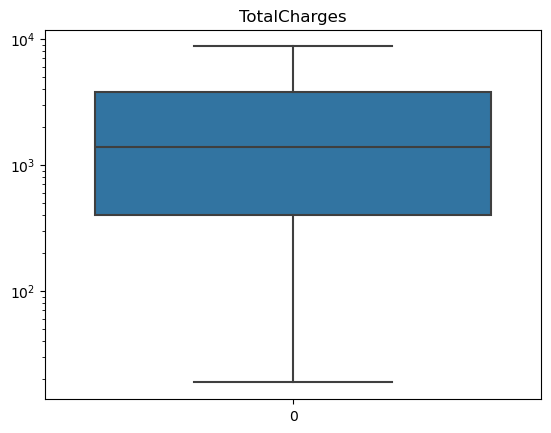

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(num_telecom['TotalCharges'])
plt.yscale('log')
plt.title('TotalCharges')

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
X=telecom.drop(['Churn', 'customerID'], axis=1)
X.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,1,0,1,29.85,29.85,0,1,0,False,False,...,False,True,True,False,True,False,True,False,True,False
1,34,1,0,56.95,1889.50,0,0,0,True,False,...,True,False,False,True,True,False,True,False,True,False
2,2,1,1,53.85,108.15,0,0,0,False,False,...,False,True,True,False,True,False,True,False,True,False
3,45,0,0,42.30,1840.75,0,0,0,True,False,...,True,False,False,True,False,True,True,False,True,False
4,2,1,1,70.70,151.65,0,0,0,False,False,...,True,False,True,False,True,False,True,False,True,False


In [59]:
y=telecom['Churn']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [60]:
X_train, X_test, y_train, y_test=train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [61]:
from sklearn.preprocessing import StandardScaler

In [62]:
scaler=StandardScaler()
X_train[['tenure', 'MonthlyCharges', 'TotalCharges']]=scaler.fit_transform(X_train[['tenure', 'MonthlyCharges', 'TotalCharges']])

In [63]:
X_train.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
877,0.754422,0,0,-0.145568,0.348921,0,0,1,True,False,...,True,False,False,True,False,True,False,True,False,True
5792,-0.710751,1,1,1.051796,-0.380014,1,0,0,False,False,...,True,False,False,True,False,True,True,False,True,False
5334,0.673024,1,1,1.437668,1.327842,0,1,1,False,True,...,False,True,False,True,False,True,False,True,False,True
878,1.120716,1,0,0.006794,0.774068,0,0,0,True,False,...,True,False,False,True,False,True,True,False,True,False
6578,-0.914247,1,0,0.298268,-0.703987,0,0,1,True,False,...,True,False,False,True,False,True,True,False,True,False


In [64]:
print(telecom['Churn'])

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64


In [71]:
telecom['Churn'].value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

In [65]:
churn=(sum(telecom['Churn'])/len(telecom['Churn'].index))*100

In [66]:
churn

26.536987079369588